# Action Sequence Graph Tutorial

This tutorial covers use of the Action Sequence Graph in the FxnBlock class, which is useful for representing a Function's progress through a sequence of actions (e.g., modes of operation, etc)..

In [1]:
# for use in development - makes sure git version is used instead of pip-installed version
import sys, os
sys.path.insert(1,os.path.join(".."))

from fmdtools.modeldef import *
import fmdtools.resultdisp as rd
import fmdtools.faultsim.propagate as prop

In [7]:
class Perceive(Action):
    def __init__(self, name, flows):
        super().__init__(name,flows)
        self.assoc_modes({'failed_noaction'}, exclusive=True)
class Act(Action):
    def __init__(self, name, flows):
        super().__init__(name,flows)
        self.assoc_modes({'failed_noaction'}, exclusive=True)
class Done(Action):
    def __init__(self, name, flows):
        super().__init__(name,flows)
        self.assoc_modes({'failed_noaction'}, exclusive=True)

class ProduceCondition(FxnBlock):
    def __init__(self,name, flows):
        super().__init__(name, flows)
class DetectHazard(FxnBlock):
    def __init__(self,name, flows):
        super().__init__(name, flows, states={"t_count":0})
        self.add_act("Perceive", Perceive)
        self.add_act("Act", Act)
        self.add_act("Done", Done)
        
        self.add_cond("Perceive","Act")
        self.add_cond("Act","Done")
        self.add_cond("Done", "Perceive", "Ready", self.is_ready)
        self.assoc_modes(exclusive=True)
        self.build_ASG(initial_action="Perceive", asg_proptype='dynamic')
    def is_ready(self):
        if self.t_count<3:  ready=False; self.t_count+=1
        else:               ready=True;  self.t_count=0
        return ready
class PassSafeConditions(FxnBlock):
    def __init__(self,name, flows):
        super().__init__(name, flows)
class FixHazardConditions(FxnBlock):
    def __init__(self,name, flows):
        super().__init__(name, flows)

class HazardModel(Model):
    def __init__(self, params={}, modelparams={'times':[0,60], 'tstep':1}, valparams={}):
        super().__init__(params,modelparams,valparams)
        
        self.add_flow("Condition", {"present":False, "hazarous":False})
        self.add_flow("Mitigated_Condition", {"present":False, "hazarous":False})
        self.add_flow("Passed_Condition", {"present":False, "hazarous":False})
        
        self.add_fxn("ProduceCondition", ['Condition'],  ProduceCondition)
        self.add_fxn("DetectHazard",['Condition', 'Mitigated_Condition', 'Passed_Condition'], DetectHazard)
        self.add_fxn("PassSafeConditions", ['Mitigated_Condition'], PassSafeConditions)
        self.add_fxn("FixHazardConditions", ['Passed_Condition'], FixHazardConditions)
        self.build_model()

In [8]:
mdl = HazardModel()

In [9]:
mdl.fxns['DetectHazard']

DetectHazard DetectHazard function: ({'t_count': 0, 'mode': 'Perceive'}, {'nom'})

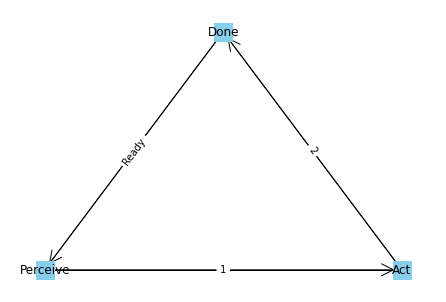

In [10]:
mdl.fxns['DetectHazard'].show_ASG()

In [11]:
mdl.fxns['DetectHazard'].mode

'Perceive'

In [12]:
mdl.fxns['DetectHazard'].opermodes

['Perceive', 'Act', 'Done']

In [13]:
mdl.fxns['DetectHazard'].faults

{'nom'}

In [14]:
mdl.fxns['DetectHazard'].updatefxn('dynamic',time=1)

In [15]:
mdl.fxns['DetectHazard'].mode

'Done'

In [16]:
mdl.fxns['DetectHazard'].updatefxn('dynamic',time=2)
mdl.fxns['DetectHazard'].updatefxn('dynamic',time=3)
mdl.fxns['DetectHazard'].updatefxn('dynamic',time=4)
mdl.fxns['DetectHazard'].updatefxn('dynamic',time=5)

In [17]:
mdl.fxns['DetectHazard'].mode

'Done'

In [18]:
prop.nominal(mdl)

({'faults': {},
  'classification': {'rate': 1.0, 'cost': 1, 'expected cost': 1.0}},
 {'flows': {'Condition': {'present': array([False, False, False, False, False, False, False, False, False,
           False, False, False, False, False, False, False, False, False,
           False, False, False, False, False, False, False, False, False,
           False, False, False, False, False, False, False, False, False,
           False, False, False, False, False, False, False, False, False,
           False, False, False, False, False, False, False, False, False,
           False, False, False, False, False, False, False]),
    'hazarous': array([False, False, False, False, False, False, False, False, False,
           False, False, False, False, False, False, False, False, False,
           False, False, False, False, False, False, False, False, False,
           False, False, False, False, False, False, False, False, False,
           False, False, False, False, False, False, False, False, F